In [43]:
%load_ext autoreload
%autoreload 2

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, recall_score, f1_score

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mediapipe as mp
import pickle

mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
df = pd.read_csv('alphabet_gestures.csv')
df = df.drop(columns=["frame"])
X = df.drop('class', axis=1) 
y = df['class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=12345)

In [27]:
y_test

3192     G
621      B
10518    Q
5897     K
17773    Z
        ..
14950    V
1503     D
4529     I
11082    Q
1740     D
Name: class, Length: 5874, dtype: object

In [28]:
pipelines = {
    'lr':make_pipeline(MinMaxScaler(), LogisticRegression(solver='lbfgs', max_iter=100)),
    'rc':make_pipeline(MinMaxScaler(), RidgeClassifier()),
    'rf':make_pipeline(MinMaxScaler(), RandomForestClassifier()),
    'sv':make_pipeline(MinMaxScaler(), SVC(probability=True))
}

In [29]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

/home/redbird/miniconda3/envs/mediapipe/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
fit_models

{'lr': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'sv': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('svc', SVC(probability=True))])}

In [31]:
fit_models['sv'].predict(X_test)

array(['G', 'B', 'Q', ..., 'I', 'Q', 'D'], dtype=object)

In [45]:
names=['Log.Regress','Ridge Class','Rand.Forest', 'SVC']
accuracy, recall, f1_scores = [], [], []
accuracy=[]
for algorithm, model in fit_models.items():
    y_pred= model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy.append(acc)
    recall.append(rec)
    f1_scores.append(f1)
    print(algorithm, acc, rec, f1)

tr_split = pd.DataFrame({'name': names,'accuracy': accuracy, 'recall': recall, 'f1_score': f1_scores})

lr 0.8976847122914539 0.8976847122914539 0.9006127046805557
rc 0.884916581545795 0.884916581545795 0.8859556234154256
rf 0.9909771876064011 0.9909771876064011 0.9911043623233006
sv 0.886789240721825 0.886789240721825 0.890633321350501


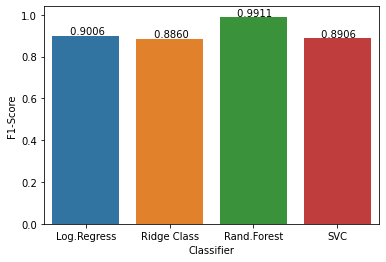

In [47]:
axis = sns.barplot (x = 'name', y = 'f1_score', data = tr_split) 
axis.set (xlabel = 'Classifier', ylabel = 'F1-Score')

for p in axis.patches: 
    height = p.get_height() 
    axis.text (p.get_x () + p.get_width () / 2, height + 0.005, '{: 1.4f}'. format
                 (height), ha = "center") 

In [11]:
words = ['dolor_cabeza', 'hospital', 'ponerse_mascarilla', 'dolor_garganta', 'dificultad_respirar', 'coronavirus', 'evitar_contacto', 'quedan_en_casa', 'fiebre', 'medico']

In [11]:
words = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

RandomForestClassifier(random_state=0)

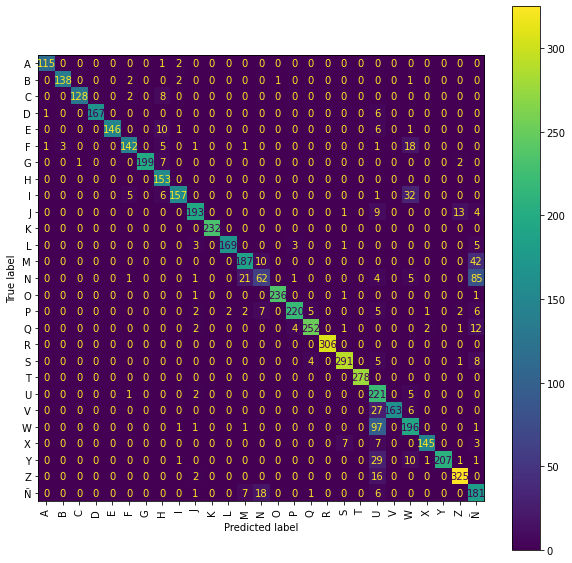

In [48]:
#clf = SVC(random_state=0)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
#SVC(random_state=0)
display(RandomForestClassifier(random_state=0))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.show()

In [49]:
print(classification_report(y_test, y_pred, labels=clf.classes_))

              precision    recall  f1-score   support

           A       0.98      0.97      0.98       118
           B       0.98      0.96      0.97       144
           C       0.99      0.93      0.96       138
           D       1.00      0.96      0.98       174
           E       1.00      0.89      0.94       164
           F       0.93      0.83      0.87       172
           G       1.00      0.95      0.98       209
           H       0.81      1.00      0.89       153
           I       0.96      0.78      0.86       201
           J       0.92      0.88      0.90       220
           K       1.00      1.00      1.00       232
           L       0.99      0.93      0.96       181
           M       0.85      0.78      0.82       239
           N       0.64      0.34      0.45       180
           O       1.00      0.99      0.99       239
           P       0.96      0.87      0.92       252
           Q       0.96      0.92      0.94       274
           R       1.00    

In [52]:
with open('alphabet_gestures.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)